<a href="https://colab.research.google.com/github/costagean/Redes_Neurais/blob/main/projeto_redes%20neurais_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [150]:
# bibliotecas que serão utilizadas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.metrics import r2_score 
from sklearn.externals import joblib
from google.colab import files


In [151]:
# para a originar um gráfico no browser
%matplotlib inline

In [152]:
# Para captação e leitura dos dados
!git clone https://github.com/costagean/Redes_Neurais
%cd Redes_Neurais

Cloning into 'Redes_Neurais'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 38 (delta 17), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (38/38), done.
/content/Redes_Neurais/Redes_Neurais/Redes_Neurais/Redes_Neurais/Redes_Neurais/Redes_Neurais/Redes_Neurais/Redes_Neurais/Redes_Neurais/Redes_Neurais/Redes_Neurais/Redes_Neurais


In [153]:
# Para leitura dos dados
df=pd.read_excel("dados para projeto de rede neural3.xlsx")
print(df.head())

  Amostras   ղ(%)  CZ (%)  MV (%)  CF (%)  PCS (MJ/kg)       EDF         EY
0        B   0.00    3.25   75.33   21.42    19.292709  0.000000   0.000000
1        1  61.32    7.75   76.88   21.69    19.594726  1.047147  64.211052
2        2  61.43    0.14   83.95   15.91    18.712489  1.000000  61.430000
3        3  47.14    1.48   79.75   18.77    19.058553  1.018494  48.011795
4        4  54.26    1.10   78.90   20.00    19.363930  1.034813  56.148962


In [154]:
filename = 'model_ANN.pkl'
model = joblib.load(filename)


In [155]:
# separando as colunas de interesse
Index=[1,2,3,4,5,6,7]
X=df.iloc[:,Index].copy()
print(X.head())

    ղ(%)  CZ (%)  MV (%)  CF (%)  PCS (MJ/kg)       EDF         EY
0   0.00    3.25   75.33   21.42    19.292709  0.000000   0.000000
1  61.32    7.75   76.88   21.69    19.594726  1.047147  64.211052
2  61.43    0.14   83.95   15.91    18.712489  1.000000  61.430000
3  47.14    1.48   79.75   18.77    19.058553  1.018494  48.011795
4  54.26    1.10   78.90   20.00    19.363930  1.034813  56.148962


In [156]:

df.head(4)

,Amostras,ղ(%),CZ (%),MV (%),CF (%),PCS (MJ/kg),EDF,EY
0,B,0.00,3.25,75.33,21.42,19.292709,0.000000,0.000000
1,1,61.32,7.75,76.88,21.69,19.594726,1.047147,64.211052
2,2,61.43,0.14,83.95,15.91,18.712489,1.000000,61.430000
3,3,47.14,1.48,79.75,18.77,19.058553,1.018494,48.011795


In [157]:
df.tail(4)


,Amostras,ղ(%),CZ (%),MV (%),CF (%),PCS (MJ/kg),EDF,EY
53,53,24.430,38.100,47.905,23.806684,15.589253,1.098941,55.985558
54,54,26.945,36.385,51.665,22.272240,15.646235,1.098941,55.985558
55,55,24.320,36.275,49.840,24.207240,16.046791,1.120347,54.135167
56,56,25.060,33.270,52.105,24.533893,16.538848,1.137803,55.422403


In [158]:
Index=['EY']
y =df[Index]

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.10, shuffle=True, random_state=3)

In [160]:
scaler_X = preprocessing.MinMaxScaler((-1,1)).fit(X)
scaler_Y = preprocessing.MinMaxScaler((-1,1)).fit(y)

In [161]:
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)
y_train = scaler_Y.transform(y_train)
y_test = scaler_Y.transform(y_test)

In [162]:
# Definir a rede neural
N_Hidden=20
model = MLPRegressor(solver='lbfgs',activation='tanh',alpha=1e-5,hidden_layer_sizes=(N_Hidden), max_iter=1500,random_state=11 )

In [163]:
#btreinar a rede neural
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=20, learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1500,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=11, shuffle=True, solver='lbfgs',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [164]:
# treinar calculos de treino e teste
y_calc_train=model.predict(X_train)
y_calc_test=model.predict(X_test)

In [165]:
# transforma dos dados calculados na forma original (nao normatizado)
y_obs_train=scaler_Y.inverse_transform(np.array(y_train).reshape(-1,1))
y_obs_test=scaler_Y.inverse_transform(np.array(y_test).reshape(-1,1))
y_calc_train=scaler_Y.inverse_transform(y_calc_train.reshape(-1,1))
y_calc_test=scaler_Y.inverse_transform(y_calc_test.reshape(-1,1))

In [166]:
print(pd.DataFrame({'test calc':y_calc_test.ravel(),'test true':y_obs_test.ravel()}))


   test calc  test true
0  52.054506  52.051330
1  57.149069  56.943635
2  52.871358  52.772772
3  56.011383  55.985558
4  57.031458  57.310269
5  55.662504  55.758903


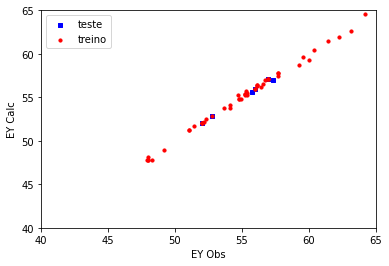

In [167]:
# expressa os dois dados em figura
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(y_obs_test,y_calc_test, s=10, c='b', marker="s", label='teste')
ax1.scatter(y_obs_train,y_calc_train, s=10, c='r', marker="o", label='treino')
plt.legend(loc='upper left')
plt.xlim([40,65])
plt.ylim([40,65])
plt.ylabel('EY Calc')
plt.xlabel('EY Obs')
plt.show()

In [168]:
mse=mean_squared_error(y_obs_test,y_calc_test)
print("MSE teste=",mse)
R2=r2_score(y_obs_test,y_calc_test)
print("R^2 teste=",R2)

MSE teste= 0.02327125597962886
R^2 teste= 0.9942314041012635


In [169]:
mse=mean_squared_error(y_obs_train,y_calc_train)
print("MSE treino=",mse)
R2=r2_score(y_obs_train,y_calc_train)
print("R^2 treino=",R2)

MSE treino= 0.06520315530759983
R^2 treino= 0.9991083860197812
